In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
s1_train = pd.read_csv('SalaryData_Train(1).csv')
s1_train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

**Label Encoding**


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
salary_train['workclass']= label_encoder.fit_transform(salary_train['workclass']) 
salary_train['education']= label_encoder.fit_transform(salary_train['education'])
salary_train['maritalstatus']= label_encoder.fit_transform(salary_train['maritalstatus'])
salary_train['occupation']= label_encoder.fit_transform(salary_train['occupation'])
salary_train['relationship']= label_encoder.fit_transform(salary_train['relationship'])
salary_train['race']= label_encoder.fit_transform(salary_train['race'])
salary_train['sex']= label_encoder.fit_transform(salary_train['sex'])
salary_train['native']= label_encoder.fit_transform(salary_train['native'])
salary_train['Salary']= label_encoder.fit_transform(salary_train['Salary'])

In [ ]:
salary_train


age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
18640   62          4         11            9              4           7   
18641   44          2         15           10              0           2   
18642   28          1         11            9              2          10   
18643   68          1         12           14              6           9   
18644   40          0         15           10              4           0   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1         2174            0            40   
1                 0     4    1            0            0            13   
2                 1     4    1            0            0            40   
3                 0     2    1            0            0            40   
4                 5     2    0            0            0            40   
...             ...   ...  ...          ...          ...           ...   
18640             4     4    0            0            0             6   
18641             1     4    1            0            0            55   
18642             0     4    1         3908            0            40   
18643             4     2    0            0            0            40   
18644             4     4    0            0            0            40   

       native  Salary  
0          38       0  
1          38       0  
2          38       0  
3          38       0  
4           4       0  
...       ...     ...  
18640      38       0  
18641      38       0  
18642      38       0  
18643      38       1  
18644      37       2  

[17189 rows x 14 columns]

In [ ]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17189 entries, 0 to 18644
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            17189 non-null  int64
 1   workclass      17189 non-null  int64
 2   education      17189 non-null  int64
 3   educationno    17189 non-null  int64
 4   maritalstatus  17189 non-null  int64
 5   occupation     17189 non-null  int64
 6   relationship   17189 non-null  int64
 7   race           17189 non-null  int64
 8   sex            17189 non-null  int64
 9   capitalgain    17189 non-null  int64
 10  capitalloss    17189 non-null  int64
 11  hoursperweek   17189 non-null  int64
 12  native         17189 non-null  int64
 13  Salary         17189 non-null  int64
dtypes: int64(14)
memory usage: 2.0 MB


In [ ]:
salary_train.shape

(17189, 14)

In [ ]:
salary_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

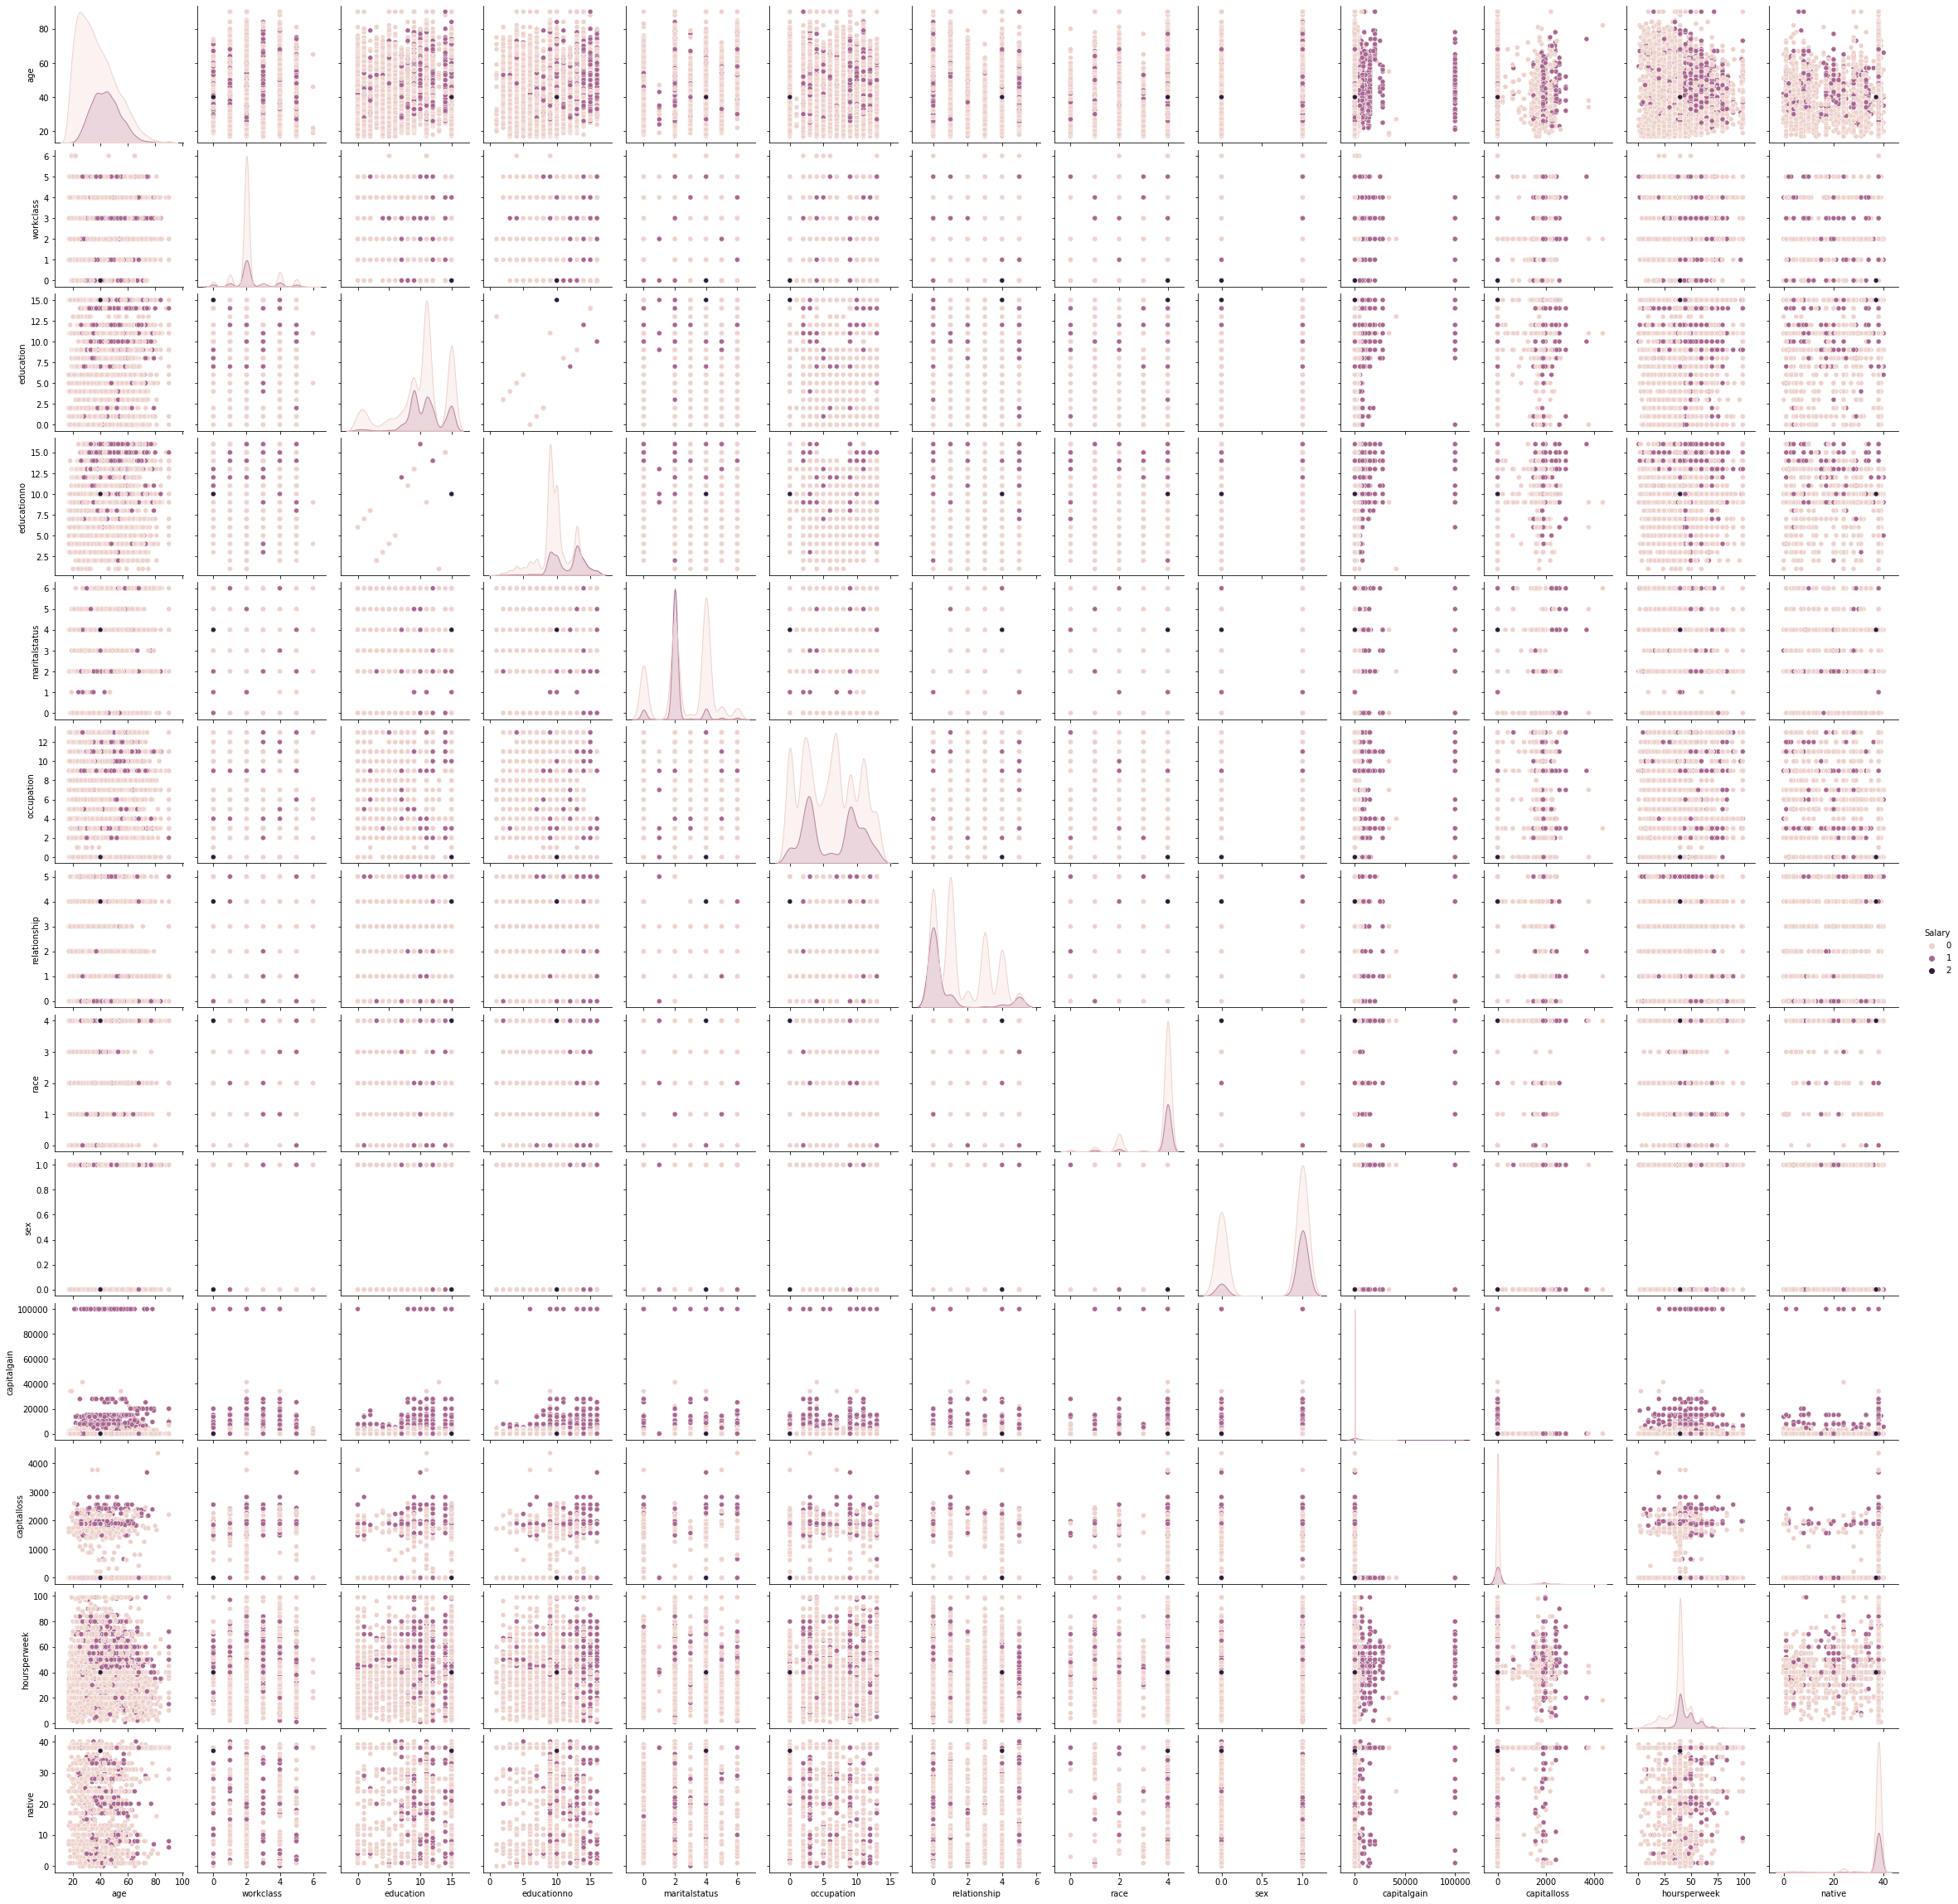

In [ ]:
sns.pairplot(salary_train, hue='Salary')

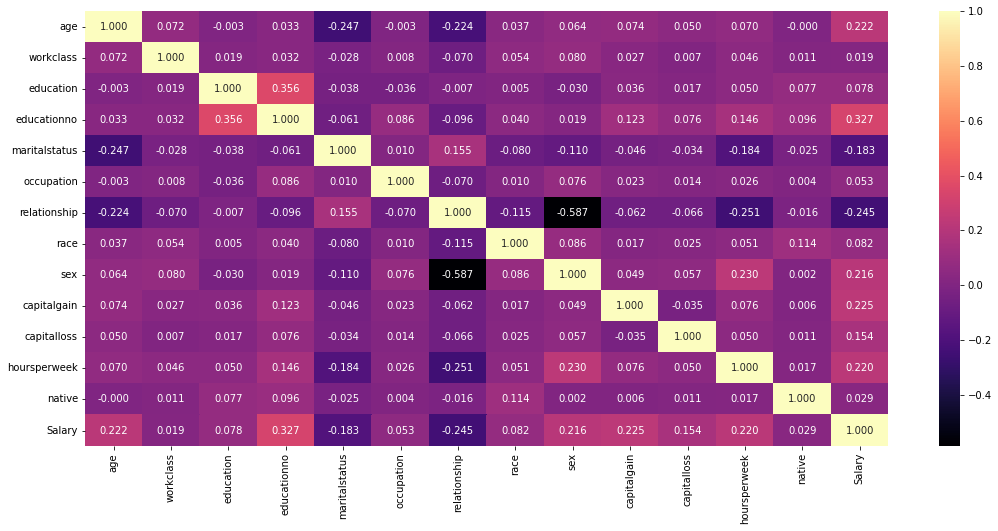

In [ ]:
plt.figure(figsize = (18, 8));
sns.heatmap(salary_train.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

**Test Dataset:**

In [ ]:
s2_test = pd.read_csv('SalaryData_Test(1).csv')
s2_test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [ ]:
salary_test = s2_test.drop_duplicates()
salary_test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[14130 rows x 14 columns]

**Label Encoding**


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
salary_test['workclass']= label_encoder.fit_transform(salary_test['workclass']) 
salary_test['education']= label_encoder.fit_transform(salary_test['education'])
salary_test['maritalstatus']= label_encoder.fit_transform(salary_test['maritalstatus'])
salary_test['occupation']= label_encoder.fit_transform(salary_test['occupation'])
salary_test['relationship']= label_encoder.fit_transform(salary_test['relationship'])
salary_test['race']= label_encoder.fit_transform(salary_test['race'])
salary_test['sex']= label_encoder.fit_transform(salary_test['sex'])
salary_test['native']= label_encoder.fit_transform(salary_test['native'])
salary_test['Salary']= label_encoder.fit_transform(salary_test['Salary'])


In [ ]:
salary_test


age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 3     2    1            0            0            40   
1                 0     4    1            0            0            50   
2                 0     4    1            0            0            40   
3                 0     2    1         7688            0            40   
4                 1     4    1            0            0            30   
...             ...   ...  ...          ...          ...           ...   
15055             3     4    1            0            0            40   
15056             1     4    0            0            0            36   
15057             0     4    1            0            0            50   
15058             3     1    1         5455            0            40   
15059             0     4    1            0            0            60   

       native  Salary  
0          37       0  
1          37       0  
2          37       1  
3          37       1  
4          37       0  
...       ...     ...  
15055      37       0  
15056      37       0  
15057      37       0  
15058      37       0  
15059      37       1  

[14130 rows x 14 columns]

In [ ]:
salary_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            14130 non-null  int64
 1   workclass      14130 non-null  int64
 2   education      14130 non-null  int64
 3   educationno    14130 non-null  int64
 4   maritalstatus  14130 non-null  int64
 5   occupation     14130 non-null  int64
 6   relationship   14130 non-null  int64
 7   race           14130 non-null  int64
 8   sex            14130 non-null  int64
 9   capitalgain    14130 non-null  int64
 10  capitalloss    14130 non-null  int64
 11  hoursperweek   14130 non-null  int64
 12  native         14130 non-null  int64
 13  Salary         14130 non-null  int64
dtypes: int64(14)
memory usage: 1.6 MB


In [ ]:
salary_test.shape

(14130, 14)

In [ ]:
salary_test.isna().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

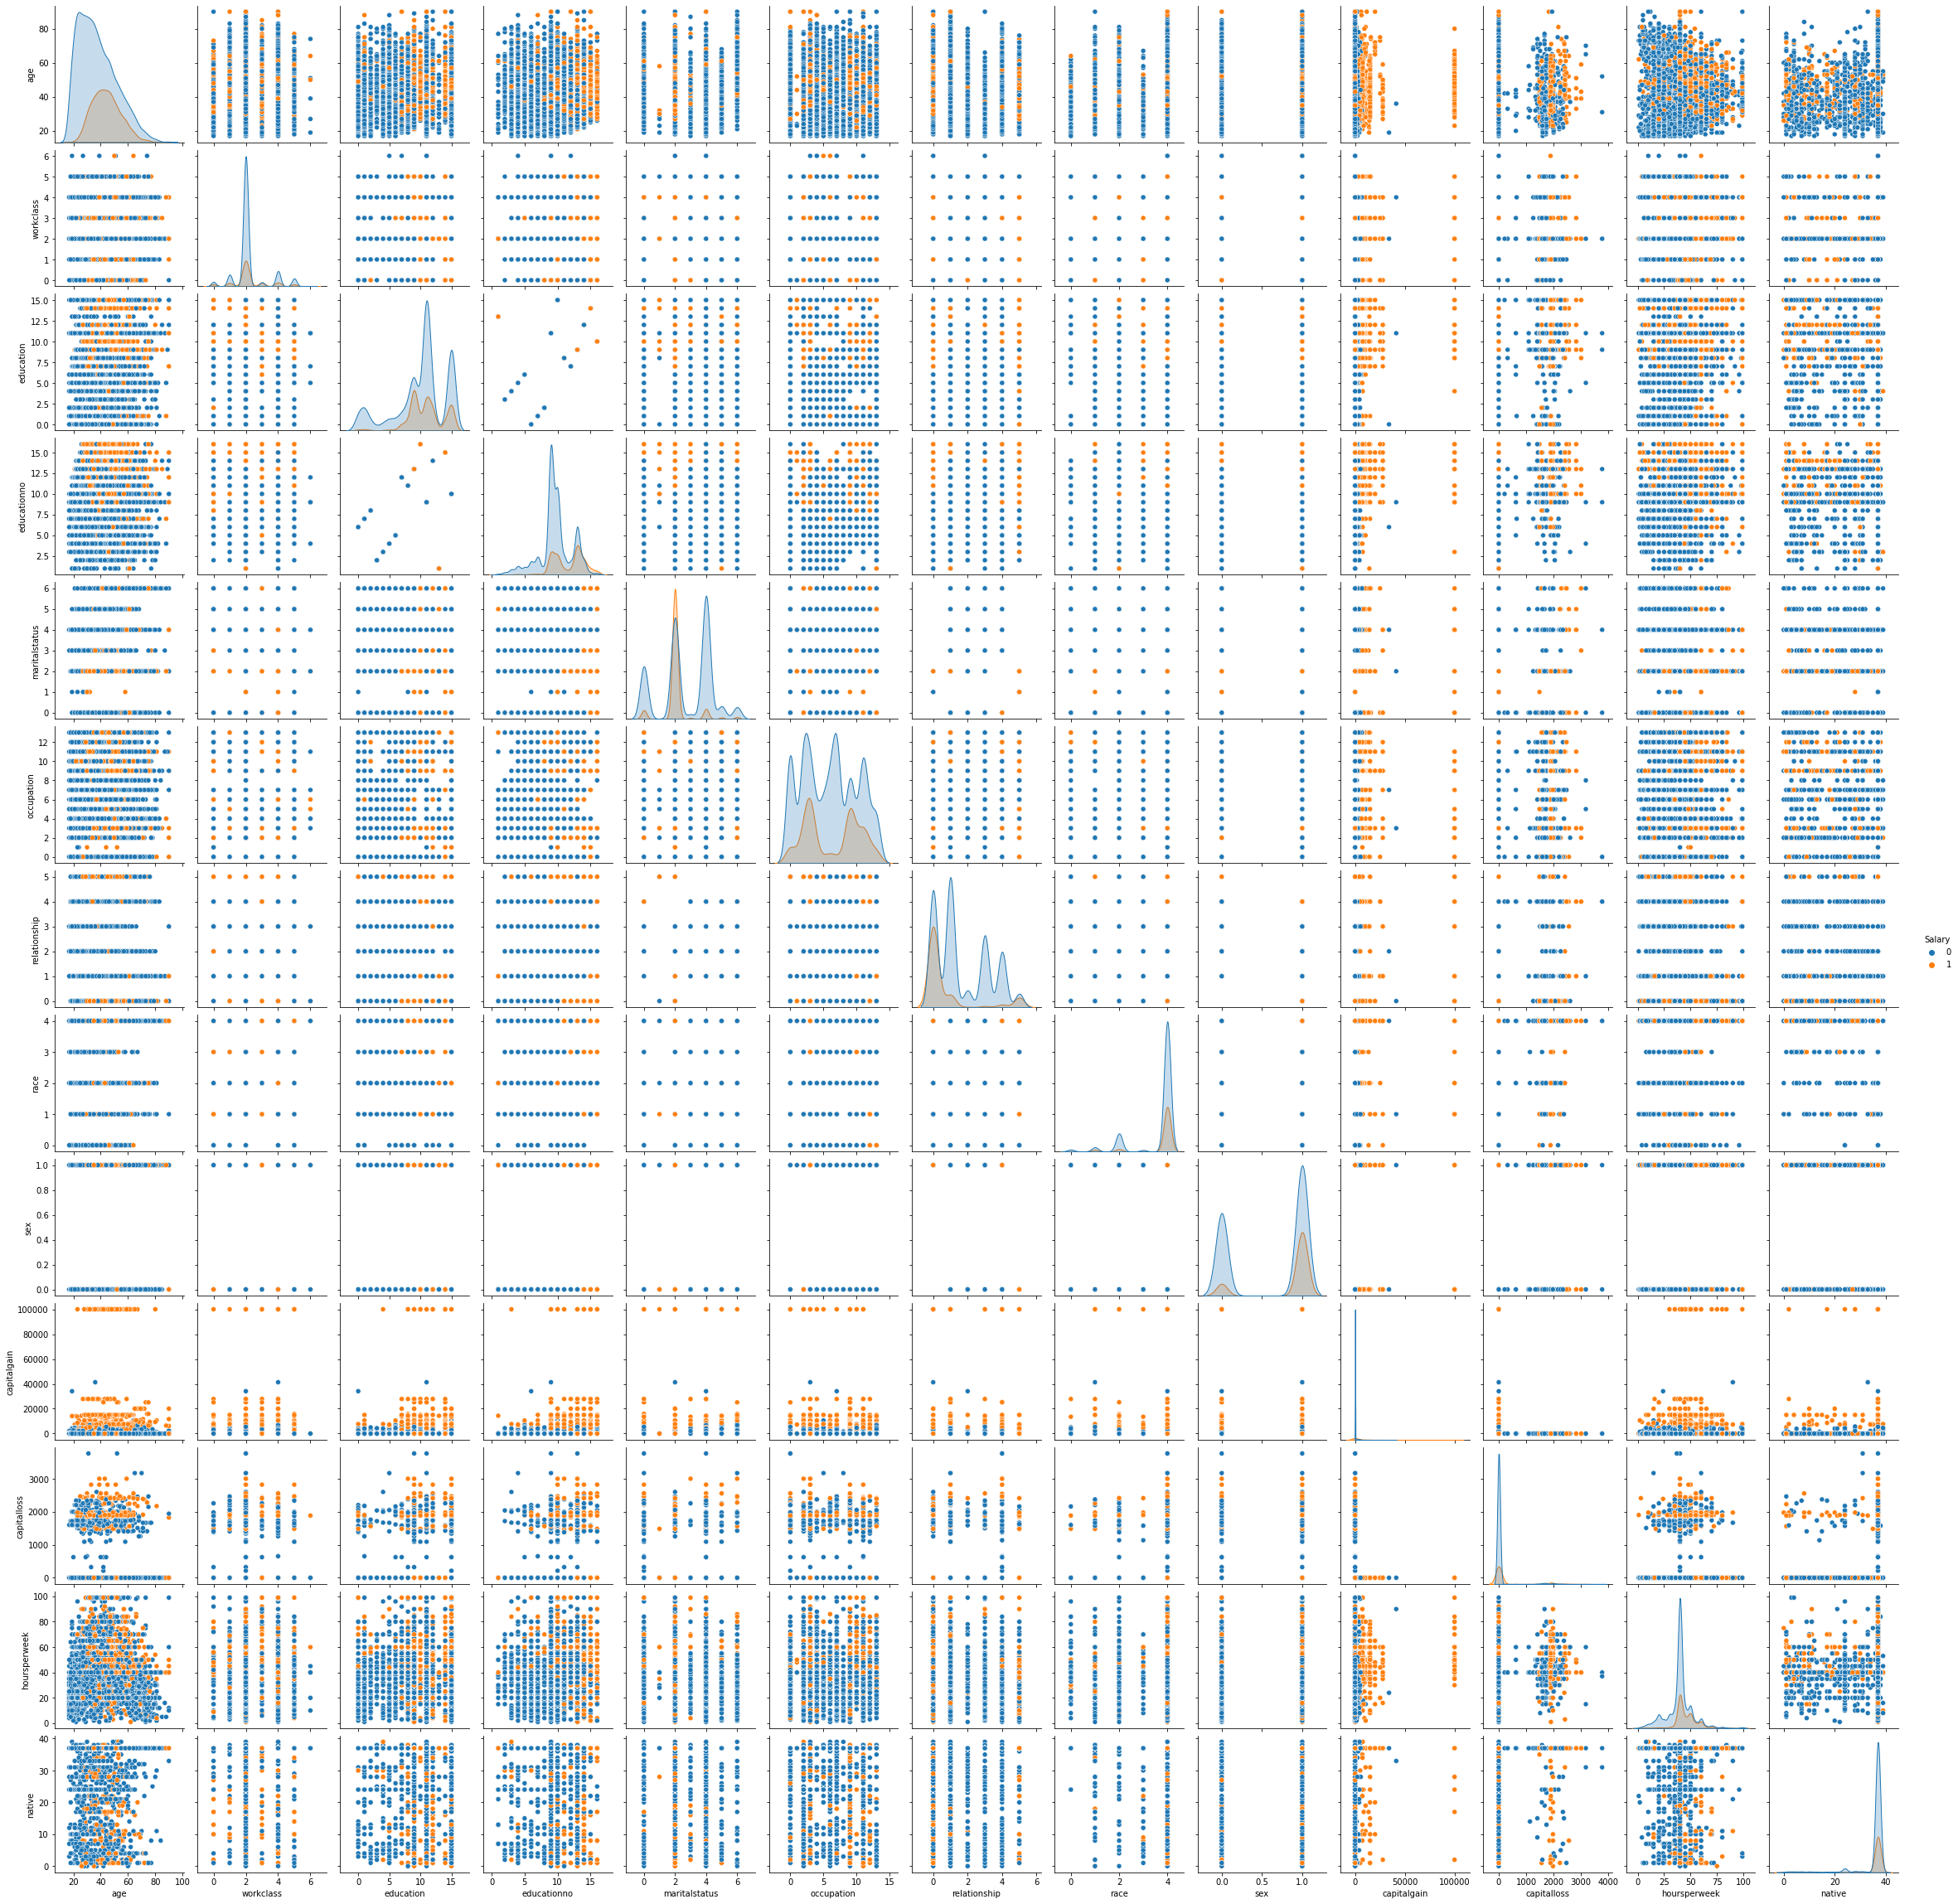

In [ ]:
sns.pairplot(salary_test, hue='Salary')


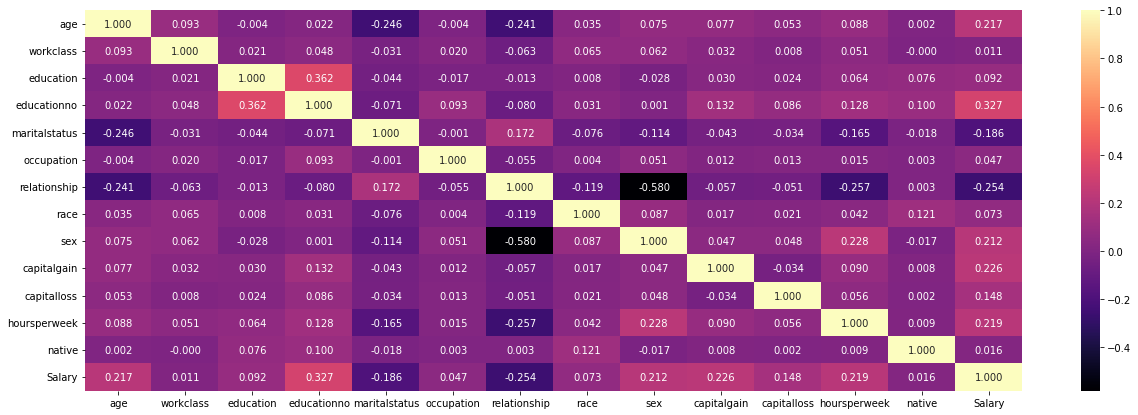

In [ ]:
plt.figure(figsize = (21, 7));
sns.heatmap(salary_test.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

**Applying Train and Test split on Salary Dataset:**


In [ ]:
X_train=salary_train.iloc[:,0:-1]
Y_train=salary_train['Salary']

In [ ]:
X_train 

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
18640   62          4         11            9              4           7   
18641   44          2         15           10              0           2   
18642   28          1         11            9              2          10   
18643   68          1         12           14              6           9   
18644   40          0         15           10              4           0   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0                 1     4    1         2174            0            40      38  
1                 0     4    1            0            0            13      38  
2                 1     4    1            0            0            40      38  
3                 0     2    1            0            0            40      38  
4                 5     2    0            0            0            40       4  
...             ...   ...  ...          ...          ...           ...     ...  
18640             4     4    0            0            0             6      38  
18641             1     4    1            0            0            55      38  
18642             0     4    1         3908            0            40      38  
18643             4     2    0            0            0            40      38  
18644             4     4    0            0            0            40      37  

[17189 rows x 13 columns]

In [ ]:
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
18640    0
18641    0
18642    0
18643    1
18644    2
Name: Salary, Length: 17189, dtype: int64

In [ ]:
X_test=salary_test.iloc[:,:-1]
Y_test=salary_test['Salary']

In [ ]:
X_test

age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0                 3     2    1            0            0            40      37  
1                 0     4    1            0            0            50      37  
2                 0     4    1            0            0            40      37  
3                 0     2    1         7688            0            40      37  
4                 1     4    1            0            0            30      37  
...             ...   ...  ...          ...          ...           ...     ...  
15055             3     4    1            0            0            40      37  
15056             1     4    0            0            0            36      37  
15057             0     4    1            0            0            50      37  
15058             3     1    1         5455            0            40      37  
15059             0     4    1            0            0            60      37  

[14130 rows x 13 columns]

In [ ]:
Y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 14130, dtype: int64

**SVM with kernel rbf**

In [ ]:
clf = SVC(kernel="rbf")
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, Y_pred)

Accuracy = 79.60368011323425


array([[10257,   363],
       [ 2519,   991]])

**SVM with kernel sigmoid**

In [ ]:
clf = SVC(kernel="sigmoid")
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, Y_pred)

Accuracy = 75.3857041755131


array([[9813,  807],
       [2671,  839]])

**SVM with kernel poly**

In [ ]:
clf = SVC(kernel="poly")
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, Y_pred)

Accuracy = 77.47346072186836


array([[10617,     3],
       [ 3180,   330]])